In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np
%pylab inline
import nltk
from nltk import bigrams
from nltk import word_tokenize
from nltk import punkt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import re


Populating the interactive namespace from numpy and matplotlib


In [2]:
salary_data = pd.read_csv("Train_rev1.csv")

In [3]:
jobdescriptions = salary_data["FullDescription"][0:1000]
jobdescriptions = jobdescriptions.str.decode("utf-8")
clean_jobdescriptions = []
for desc in jobdescriptions:
    clean_jobdescriptions.append(desc)
clean_jobdescriptions2 = " ".join(clean_jobdescriptions)

In [4]:
tokens = nltk.word_tokenize(clean_jobdescriptions2)

In [83]:
tokens[:10]

[u'Engineering',
 u'Systems',
 u'Analyst',
 u'Dorking',
 u'Surrey',
 u'Salary',
 u'****K',
 u'Our',
 u'client',
 u'is']

In [6]:
pos_tags = nltk.pos_tag(tokens)

In [7]:
pos_list = [tag[1] for tag in pos_tags]

In [84]:
pos_list[:10]

['VBG', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'PRP$', 'NN', 'VBZ']

In [9]:
Series(pos_list).value_counts()[:5]

NN     35686
NNP    30762
IN     22677
JJ     18051
DT     16998
dtype: int64

# A2

In [10]:
words = [word[0].lower() for word in pos_tags]
words = Series(words)

In [86]:
words[:10]

0    engineering
1        systems
2        analyst
3        dorking
4         surrey
5         salary
6          ****k
7            our
8         client
9             is
dtype: object

In [12]:
mask = [word.isalpha() for word in words]

In [88]:
mask[:10]

[True, True, True, True, True, True, False, True, True, True]

In [14]:
cleanwords = words[mask]

In [89]:
cleanwords[:10]

0     engineering
1         systems
2         analyst
3         dorking
4          surrey
5          salary
7             our
8          client
9              is
10        located
dtype: object

In [90]:
frequencies = list(cleanwords.value_counts()[:100])
frequencies[:10]

[8435, 7121, 6677, 5812, 4547, 4229, 3450, 3033, 2652, 2469]

In [91]:
ranks = [rank+1 for rank in range(100)]
ranks[:10]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

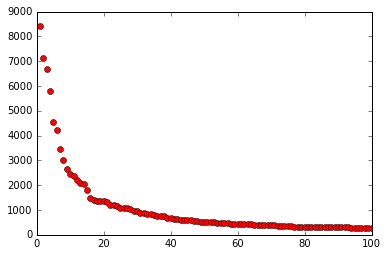

In [18]:
plt.plot(ranks, frequencies, 'ro', color="red")

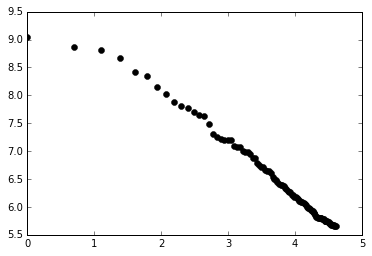

In [19]:
plt.plot([math.log(rank) for rank in ranks], [math.log(freq) for freq in frequencies], 'ro', color="black")

# A3

In [20]:
nostop = [w for w in cleanwords if not w in stopwords.words('english')]

In [21]:
lemmatizer = WordNetLemmatizer()
nostoplemmatized = [lemmatizer.lemmatize(w) for w in nostop]

In [22]:
nostoplemmatized = Series(nostoplemmatized)

In [24]:
nostoplemmatized.value_counts()[:10]

care          3060
home          2117
experience    1366
manager       1276
nurse         1266
work          1201
nursing       1180
support       1093
within        1040
working        965
dtype: int64

In [92]:
nostoplemmatized[:10]

0    engineering
1         system
2        analyst
3        dorking
4         surrey
5         salary
6         client
7        located
8        dorking
9         surrey
dtype: object

# B1

In [25]:

import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from operator import itemgetter

In [94]:
np.random.seed(1234567890)
salaries = salary_data['SalaryNormalized']
threshold = np.percentile(salaries, 75)


In [27]:
salary_data['High'] = 0.0

In [28]:
High_Mask = salary_data['SalaryNormalized'] >= threshold

In [29]:
salary_data.ix[High_Mask,'High'] = 1

In [30]:
highsalary = salary_data[High_Mask]

In [31]:
sample_highsalary = highsalary.sample(7500, replace=False).copy()

In [32]:
sample_highsalary

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,High
573,46629484,Mental Health Pharmacist Band 7 Cheshire,PULSE Staffing has an opportunity available in...,Cheshire,Cheshire,full_time,NaN,NaN,Healthcare & Nursing Jobs,22 to 27 per hour,47040,careworx.co.uk,1.0
107373,69597277,Chemicals Procurement Manager,Chemicals Procurement Manager Fantastic Inter...,Cambridge Cambridgeshire East Anglia,UK,NaN,permanent,1st Executive Ltd,Other/General Jobs,"45000 - 55000 per annum + Car, Bonus, Pension,...",50000,totaljobs.com,1.0
138386,70445011,SHO Acute Medicine North West,SHO Acute Medicine Start date: ****/****/**** ...,North,North Finchley,NaN,contract,National Locums,Healthcare & Nursing Jobs,48.00 - 53.00 GBP Hourly,96960,jobg8.com,1.0
137207,70384614,HEOR Manager Strong line management position,"My client, one of the most recognisable names ...",Hertfordshire,Hertfordshire,NaN,NaN,NonStop Pharma Recruitment,Scientific & QA Jobs,75000 - 85000 per annum,80000,access-sciencejobs.co.uk,1.0
142799,70607718,Project Development Engineer,Operations Process Project Development Engine...,Surrey,Surrey,NaN,permanent,Prime Time Recruitment,Engineering Jobs,35000 - 55000/annum Health Care,45000,cv-library.co.uk,1.0
167249,71305557,"Programme Manager, Siebel, CRM, Oracle","Programme Manager, Siebel, CRM, Oracle My clie...",Central London / West End London South East,London,NaN,contract,Haybrook IT Resourcing Ltd,IT Jobs,Up to 540 per day,129600,cwjobs.co.uk,1.0
91290,69170682,Continous Improvement Manager,Continuous Improvement Manager Job description...,Milton Keynes Buckinghamshire South East,Milton Keynes,NaN,permanent,Synergi Search & Selection,Retail Jobs,40000 - 45000 per annum + Benefits,42500,totaljobs.com,1.0
81452,69026323,"Senior Sharepoint Developer (Sharepoint 2010, ...",Senior Sharepoint Developer (Sharepoint 20****...,"W1B 1LU, England",Fitzrovia,NaN,NaN,NaN,IT Jobs,50000,50000,britishjobsonthe.net,1.0
116705,69793908,C++ Developer Mobile Games,"Job Role: C++ Games DeveloperLocation: London,...",London,London,NaN,permanent,NaN,IT Jobs,45k to 60k + bonus + benefits,52500,theitjobboard.co.uk,1.0
137539,70411373,PROPERTY LITIGATION LAWYER ****PQE BUCKINGHAM...,THE FIRM Our client is a leading regional firm...,Buckinghamshire,Buckinghamshire,NaN,permanent,Lipson Lloyd Jones London,Legal Jobs,45000 - 55000 per annum + NEGOTIABLE,50000,legalweekjobs.com,1.0


In [33]:
Low_Mask = salary_data['High'] == 0

In [34]:
lowsalary = salary_data[Low_Mask]

In [35]:
sample_lowsalary = lowsalary.sample(7500, replace=False).copy()

In [36]:
sample = sample_highsalary.append(sample_lowsalary, ignore_index=False, verify_integrity=True)

In [93]:
sample[:10]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,High
573,46629484,Mental Health Pharmacist Band 7 Cheshire,PULSE Staffing has an opportunity available in...,Cheshire,Cheshire,full_time,NaN,NaN,Healthcare & Nursing Jobs,22 to 27 per hour,47040,careworx.co.uk,1.0
107373,69597277,Chemicals Procurement Manager,Chemicals Procurement Manager Fantastic Inter...,Cambridge Cambridgeshire East Anglia,UK,NaN,permanent,1st Executive Ltd,Other/General Jobs,"45000 - 55000 per annum + Car, Bonus, Pension,...",50000,totaljobs.com,1.0
138386,70445011,SHO Acute Medicine North West,SHO Acute Medicine Start date: ****/****/**** ...,North,North Finchley,NaN,contract,National Locums,Healthcare & Nursing Jobs,48.00 - 53.00 GBP Hourly,96960,jobg8.com,1.0
137207,70384614,HEOR Manager Strong line management position,"My client, one of the most recognisable names ...",Hertfordshire,Hertfordshire,NaN,NaN,NonStop Pharma Recruitment,Scientific & QA Jobs,75000 - 85000 per annum,80000,access-sciencejobs.co.uk,1.0
142799,70607718,Project Development Engineer,Operations Process Project Development Engine...,Surrey,Surrey,NaN,permanent,Prime Time Recruitment,Engineering Jobs,35000 - 55000/annum Health Care,45000,cv-library.co.uk,1.0
167249,71305557,"Programme Manager, Siebel, CRM, Oracle","Programme Manager, Siebel, CRM, Oracle My clie...",Central London / West End London South East,London,NaN,contract,Haybrook IT Resourcing Ltd,IT Jobs,Up to 540 per day,129600,cwjobs.co.uk,1.0
91290,69170682,Continous Improvement Manager,Continuous Improvement Manager Job description...,Milton Keynes Buckinghamshire South East,Milton Keynes,NaN,permanent,Synergi Search & Selection,Retail Jobs,40000 - 45000 per annum + Benefits,42500,totaljobs.com,1.0
81452,69026323,"Senior Sharepoint Developer (Sharepoint 2010, ...",Senior Sharepoint Developer (Sharepoint 20****...,"W1B 1LU, England",Fitzrovia,NaN,NaN,NaN,IT Jobs,50000,50000,britishjobsonthe.net,1.0
116705,69793908,C++ Developer Mobile Games,"Job Role: C++ Games DeveloperLocation: London,...",London,London,NaN,permanent,NaN,IT Jobs,45k to 60k + bonus + benefits,52500,theitjobboard.co.uk,1.0
137539,70411373,PROPERTY LITIGATION LAWYER ****PQE BUCKINGHAM...,THE FIRM Our client is a leading regional firm...,Buckinghamshire,Buckinghamshire,NaN,permanent,Lipson Lloyd Jones London,Legal Jobs,45000 - 55000 per annum + NEGOTIABLE,50000,legalweekjobs.com,1.0


In [38]:
train = sample.sample(0.6*len(sample), replace=False).copy()

/Users/anthonygarino/Desktop/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


In [39]:
test = sample[~sample.index.isin(train.index.values)]

In [40]:
train_x = train['FullDescription']
train_y = train['High']

test_x = test['FullDescription']
test_y = test['High']

In [41]:
vectorizer = TfidfVectorizer(min_df=2, smooth_idf=True, strip_accents='unicode', norm='l2')

In [42]:
all_train_x = vectorizer.fit_transform(train_x)
all_test_x = vectorizer.transform(test_x)

In [43]:
all_nb_classifier = MultinomialNB().fit(all_train_x, train_y)

In [44]:
all_y_nb_predicted = all_nb_classifier.predict(all_test_x)

In [45]:
metrics.confusion_matrix(test_y, all_y_nb_predicted)

array([[2258,  816],
       [ 426, 2500]])

In [46]:
all_predict_y = Series(all_y_nb_predicted).reset_index()

In [47]:
all_predict_y = all_predict_y[0]

In [48]:
all_df = pd.DataFrame()

In [49]:
all_df['Predicted'] = all_predict_y

In [50]:
all_df['Actual'] = test_y.reset_index()['High']

In [51]:
pd.crosstab(index=all_df['Actual'], columns=all_df['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,2258,816
1.0,426,2500


In [52]:
pd.crosstab(index=all_df['Actual'], columns=all_df['Predicted']).apply(lambda r: r/r.sum(), axis=1)

Predicted,0.0,1.0
Actual,,
0.0,0.734548,0.265452
1.0,0.145591,0.854409


In [53]:
(all_df['Predicted'] == all_df['Actual']).mean()

0.79300000000000004

# B2

In [54]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [55]:
lemma_vectorizer = TfidfVectorizer(min_df=0, smooth_idf=True, strip_accents='unicode', norm='l2', tokenizer=LemmaTokenizer())

In [56]:
lemma_train_x = lemma_vectorizer.fit_transform(train_x)
lemma_test_x = lemma_vectorizer.transform(test_x)

In [57]:
lemma_naivebayes_classifier = MultinomialNB().fit(lemma_train_x, train_y)

In [58]:
lemma_y_naivebayes_predicted = lemma_naivebayes_classifier.predict(lemma_test_x)

In [59]:
lemma_predict_y = Series(lemma_y_naivebayes_predicted).reset_index()
lemma_predict_y = lemma_predict_y[0]

In [60]:
lemma_df = pd.DataFrame()
lemma_df['Predicted'] = lemma_predict_y
lemma_df['Actual'] = test_y.reset_index()['High']
pd.crosstab(index=lemma_df['Actual'], columns=lemma_df['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,2200,874
1.0,380,2546


In [61]:
pd.crosstab(index=lemma_df['Actual'], columns=lemma_df['Predicted']).apply(lambda r: r/r.sum(), axis=1)

Predicted,0.0,1.0
Actual,,
0.0,0.71568,0.28432
1.0,0.12987,0.87013


In [62]:
(lemma_df['Predicted'] == lemma_df['Actual']).mean()

0.79100000000000004

# B4

In [63]:
class posBigram(object):
    def __init__(self):
        pass
    def __call__(self,doc):
      return nltk.Text(nltk.bigrams([i[1] for i in nltk.pos_tag(nltk.word_tokenize(doc))]))

In [70]:
pos_bigram_vectoriser = TfidfVectorizer(min_df=0, smooth_idf=True, strip_accents='unicode', norm='l2', tokenizer=posBigram())

In [71]:
pos_bigram_train_x = pos_bigram_vectoriser.fit_transform(train_x) 

In [72]:
pos_bigram_naivebayes_classifier = MultinomialNB().fit(pos_bigram_train_x, train_y)

In [74]:
pos_bigram_test_x = pos_bigram_vectoriser.transform(test_x)

In [75]:
pos_bigram_y_naivebayes_predicted = pos_bigram_naivebayes_classifier.predict(pos_bigram_test_x)

In [ ]:
pos_bigram_test_x = pos_bigram_vectoriser.transform(test_x)
pos_bigram_y_naivebayes_predicted = pos_bigram_naivebayes_classifier.predict(pos_bigram_test_x)
pos_bigram_df = pd.DataFrame()
pos_bigram_df['Predicted'] = pos_bigram_predict_y 
pos_bigram_df['Actual'] = test_y.reset_index()['High']
pd.crosstab(index=pos_bigram_df['Actual'], columns=pos_bigram_df['Predicted'])

In [ ]:
(pos_bigram_df['Predicted'] == pos_bigram_df['Actual']).mean()